## Importing necessary libraries

In [136]:
# import the important packages
import pandas as pd               # library used for data manipulation and analysis
import numpy as np                # library used for working with arrays
import matplotlib.pyplot as plt   # library for visualization
import seaborn as sns             # library for visualization
%matplotlib inline
from scipy.stats import binom
from scipy.stats import uniform
from scipy.stats import norm

import warnings
warnings.filterwarnings('ignore')

import scipy.stats as stats       # this library contains a large number of probability distributions as well as a growing library of statistical functions

# Binomial Distribution

### Q1. A LED bulb manufacturing company regularly conducts quality checks at specified periods on the products it manufactures.  Historically, the failure rate for LED light bulbs that the company manufactures is 5%. Suppose a random sample of 10 LED light bulbs is selected. Find the probability distribution for the defective bulbs and answer the following questions.

**a) What is the probability that none of the LED bulbs are defective?**

In [16]:
n = 10 
p = 0.95
k = np.arange(0,11)
from scipy.stats import binom

# use the binom.pmf() function to generate the probability distribution
binomial = binom.pmf(k=k, n=n, p=p)
cum_binomial = stats.binom.cdf(k=k, n=n, p=p)

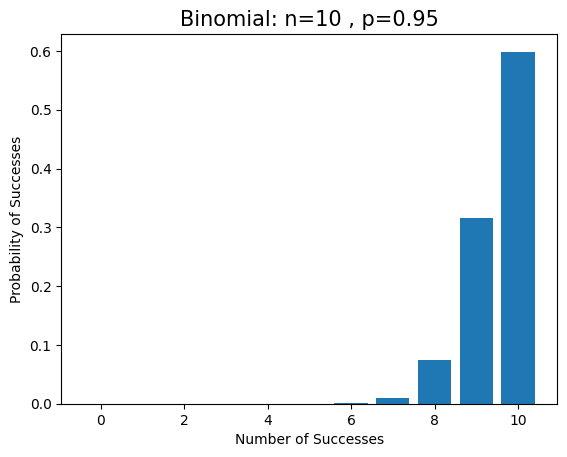

In [17]:
plt.bar(k, binomial) # make a bar plot
plt.title("Binomial: n=%i , p=%.2f" % (n, p), fontsize=15) # set the title
plt.xlabel("Number of Successes") # set the x-axis label
plt.ylabel("Probability of Successes") # set the y-axis label
plt.show() # display the plot

In [18]:
binomial[10]

0.5987369392383789

**b) What is the probability that exactly one LED bulb is defective?**

In [19]:
binomial[9]

0.3151247048623047

**c) What is the probability that two or fewer LED bulbs are defective?**

Hint: We need to calculate the cumulative probability of two or fewer LED bulbs being defective.

In [27]:
 1-cum_binomial[7]

0.9884964426207031

**d) What is the probability that three or more LED bulbs are defective?**

Hint: We need to subtract the cumulative probability of up to 2 defective LED bulbs from 1.

In [28]:
cum_binomial[7]

0.011503557379296902

### Q2. During an NBA game, a basketball player has two foul shots (free throw) and the conversion rate of free-throw shots is 93%. Find the following probabilities.

**a) What is the probability that the player will convert both the shots?**

In [66]:
n = 2
p = 0.93
k = np.arange(0,3)

In [67]:
bino2 = binom.pmf(k=k , p=p, n=n)
bino3 = stats.binom.cdf(k=k , p=p, n=n)

<function matplotlib.pyplot.show(close=None, block=None)>

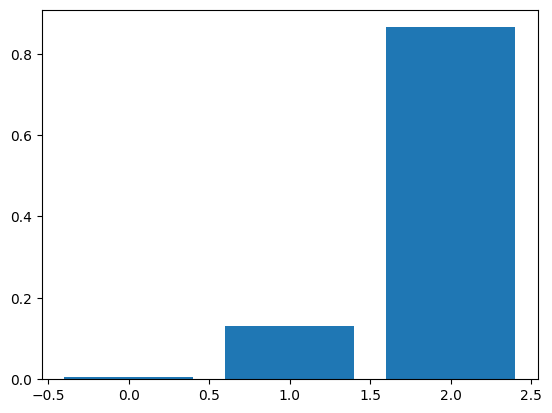

In [68]:
plt.bar(k, bino2)
plt.show

In [45]:
bino2[2]

0.8649000000000001

**b) What is the probability that the player will convert at least one shot?**

In [54]:
1- bino2[0]

0.9951

### Q3.	Over a long period in a large multinomial corporation, 10% of all sales trainees rated as outstanding, 75% rated as excellent, 10% rated as satisfactory, and 5% are considered unsatisfactory. Find the following probabilities for a sample of 10 trainees selected at random.

**a) Two are rated as outstanding**

In [105]:
n = 10 
op = 0.10
ep = 0.75
sp = 0.10
usp = 0.05
k = np.arange(0,11)

bino = binom.pmf(k = k , p = op , n =n)

<function matplotlib.pyplot.show(close=None, block=None)>

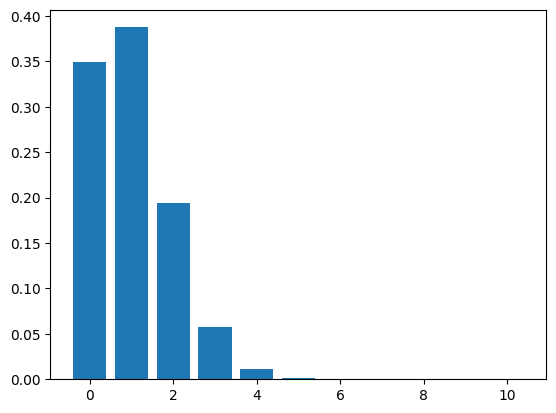

In [106]:
plt.bar(k, bino)
plt.show

In [107]:
bino[2]

0.19371024450000007

**b) Two or more are rated as outstanding**

In [108]:
1- binom.cdf(k = 1 , p = op , n =n)


0.26390107090000015

**c) Eight of the ten are rated either outstanding or excellent**

<function matplotlib.pyplot.show(close=None, block=None)>

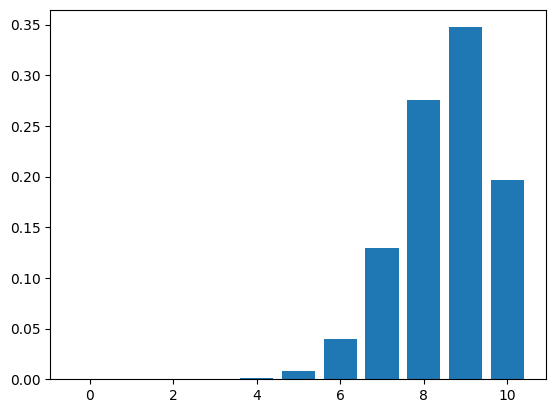

In [63]:
bino1 = binom.pmf(k = k , p = 0.85 , n =n)
plt.bar(k, bino1)
plt.show

In [103]:
binom.pmf(k = 8 , p = 0.85 , n =n)

0.27589665660205076

In [62]:
bino1[8]

0.27589665660205076

**d) None of the trainees are rated as unsatisfactory**

In [96]:
bino4 = stats.binom.cdf(k = k , p = usp , n =n)
bino4[0]

0.5987369392383789

# Uniform Distribution

### Q4. A University records the time taken by students to solve the statistics assignment in 'assignment.csv’. Plot the probability distribution this data follows and answer the following questions.

In [114]:
df = pd.read_csv("assignment.csv")
df.head()

,Student_ID,Time_taken
0,955,2.79
1,379,3.32
2,922,1.35
3,312,2.35
4,670,1.98


**a) Find the probability that a randomly selected student requires at most 2.5 hours to complete the assignment.**

**CDF:** of a random variable (X) is the probability that X will take the value less than or equal to x. It can be represented mathematically as below:

>$F_X(x) = P(X\leq x)$

In our case, the random variable (X) is the number of hours.

$ P(X\leq 2.5)$

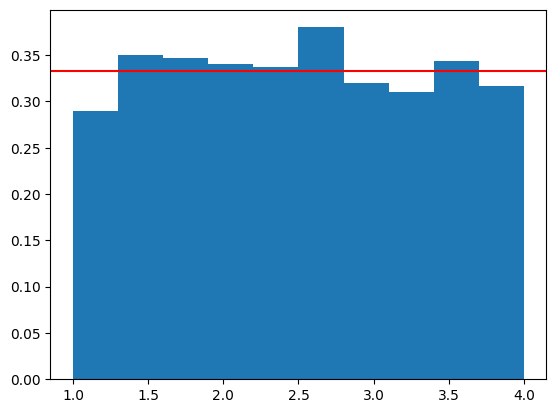

In [117]:
plt.hist(df["Time_taken"], density=True)
plt.axhline(1 / 3, color="red")

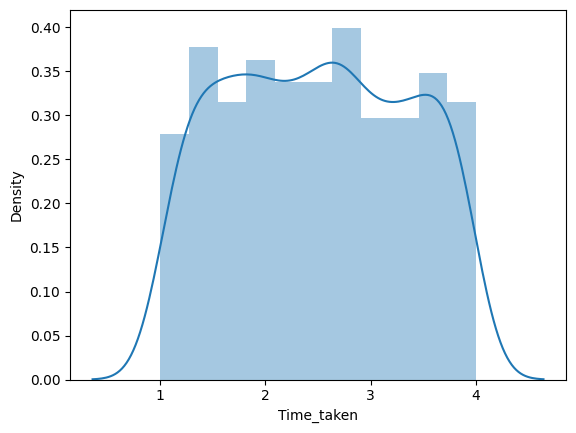

In [121]:
sns.distplot(df["Time_taken"], kde=True)
plt.show()

In [126]:
uniform.cdf(x=2.5, loc=1, scale=3)

0.5

**b) Find the probability that a randomly selected student requires at least 3 hours to complete the quiz.**

$ P(X>=3)$

In [127]:
1- uniform.cdf(x=3, loc=1, scale=3)

0.33333333333333337

**c) Find the probability that a randomly selected student requires 1.5 to 3.5 hours to complete the quiz.**

$ P(1.5<= X <=3.5)$

In [131]:
uniform.cdf(x=3.5, loc=1, scale=3)- uniform.cdf(x=1.5, loc=1, scale=3)

0.6666666666666667

# Normal Distribution

### Q5. According to the Telecommunication Industry, the average monthly cell phone bill is Rs. 850 with a standard deviation of Rs. 150. Assuming that the monthly bill follows a normal distribution, answer the following questions.

**a) What is the probability that a randomly selected cell phone bill is more than Rs 1200?**

In [137]:
mean = 850
sigma = 150
1- norm.cdf(1200, mean, sigma)

0.009815328628645315

**b) What is the probability that a randomly selected cell phone bill is between Rs 750 and Rs 1200?**

In [139]:
norm.cdf(1200, mean, sigma) - norm.cdf(750, mean, sigma)

0.7376921338244318

**c) What is the probability that a randomly selected cell phone bill is no more than Rs 650?**

In [140]:
norm.cdf(650, mean, sigma)

0.09121121972586788

**d) What is the amount above which lies in the top 15% of cell phone bills?**

In [145]:
 norm.ppf(0.85, mean, sigma)

1005.4650084240685

**e) What is the amount below which lies the bottom 25% of cell phone bills?**

In [146]:
norm.ppf(0.25, mean, sigma)

748.8265374705877

### Q6. The mean filling capacity for a coke bottle is 500 ml with a standard deviation of 20 ml. Assume that it follows a normal distribution and answer the following questions.

**a) What is the probability that the bottle filled less than 480 ml?**

In [147]:
mean = 500
sigma = 20
norm.cdf(480, mean, sigma)

0.15865525393145707

**b) What is the probability that the bottle filled more than 520 ml?**

In [148]:
1- norm.cdf(520, mean, sigma)

0.15865525393145707

**c) What is the probability that the bottle filled between 470 ml to 525 ml?**

In [149]:
norm.cdf(525, mean, sigma) - norm.cdf(470, mean, sigma)

0.8275430250642866

### Q7. In 2 Liter soft drink bottles, the drink filled is normally distributed, with a mean of 2.0 liters and a standard deviation of 0.05 liter. If bottles contain less than 95% of the listed net content (1.90 liters), the manufacturer may be subject to a penalty by the state office of consumer affairs. Bottles that have a net quantity above 2.1 liters may cause excess spillage upon opening. Answer the following questions.

**a) What is the probability that the bottle content is between 1.9 and 2.0 liters?**

In [150]:
mean = 2
sigma = 0.05
norm.cdf(2, mean, sigma) - norm.cdf(1.9, mean, sigma)

0.4772498680518209

**b) What is the probability that the bottle content is between 1.9 and 2.1 liters?**

In [151]:
norm.cdf(2.1, mean, sigma) - norm.cdf(1.9, mean, sigma)

0.9544997361036418

**c) What is the probability that the bottle content is below 1.9 liters or above 2.1 liters?**

In [155]:
1-norm.cdf(2.1, mean, sigma) + norm.cdf(1.9, mean, sigma)

0.045500263896358195

**d) 99% of the bottles contain at least what amount of soft drink in them?**

In [159]:
 norm.ppf(0.01, mean, sigma)

1.883682606297958

# Sampling Distribution

### Q8. Suppose an automobile battery manufacturer claims that the mean lifetime of their battery is 60 months with a standard deviation of 6 months. Suppose the distribution of battery life is approximately normal. Find the probability that the mean lifetime of 40 randomly sampled batteries will be less than 58 months.

In [162]:
mu = 60
sigma = 6
n = 40
x_bar = 58
s = sigma/np.sqrt(40)
# find the probability
round(norm.cdf(x_bar, loc = mu, scale = s), 4)


0.0175

# Interval Estimation

### Q9. A random sample of 40 households was selected as part of a study on electricity usage, and the number of kilowatt-hours (kWh) was recorded for each household in the sample for the first quarter of 2020. The average usage was found to be 310 kWh. In a very large study in the first quarter of the previous year, it was found that the standard deviation of the usage was 89 kWh.

### Assuming the standard deviation is unchanged and that the usage is normally distributed, provide an expression for calculating a 95% confidence interval for the mean usage in the first quarter of 2019. 

In [165]:
n = 40
mu = 310
sigma = 89
s = sigma/np.sqrt(n)
np.round(norm.interval(0.95, loc = mu, scale = s), 2)

array([282.42, 337.58])

# Hypothesis Testing

### Q10. You are a manager of a Chinese restaurant. You want to determine whether the waiting time to place an order has changed in the past month from its previous population mean value of 4.5 minutes. State the null and alternative hypotheses.

In [ ]:
mean 4.5

### Q11. What is the p-value if in a two-tail hypothesis test Z-stat = +2.00?

In [167]:
p_val = 1 - norm.cdf(2)
p_val *2

0.04550026389635842

In [169]:
1- norm.cdf(590,502,115) - norm.cdf(400,502,115)

0.034519898114094005